In [1]:
import numpy as np 

from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

In [10]:
X = 0.3 * np.random.randn(500, 2)
X_train = np.r_[X + 2, X - 2]


X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X+2, X-2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))

In [15]:
OCSVM = OneClassSVM(gamma=2.0, kernel='rbf', nu=0.05)

In [17]:
OCSVM.fit(X_train)

OneClassSVM(gamma=2.0, nu=0.05)

One-Class SVM의 경우 정상 데이터는 1의 라벨을 반환하고, 비정상 데이터는 -1의 라벨을 반환한다.

In [18]:
y_pred_train = OCSVM.predict(X_train)
y_pred_test = OCSVM.predict(X_test)
y_pred_outliers = OCSVM.predict(X_outliers)

In [24]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size

In [25]:
n_error_train, n_error_test, n_error_outliers

(48, 2, 18)

In [26]:
Z = OCSVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [29]:
transform = Nystroem(gamma=2.0, random_state=42) # kernel approximate
clf_sgd = SGDOneClassSVM(
    nu=0.05, shuffle=True, fit_intercept=True, random_state=42, tol=1e-4)

In [30]:
transfor

Nystroem(gamma=2.0, random_state=42)

In [31]:
pipe_sgd = make_pipeline(transform, clf_sgd)
pipe_sgd.fit(X_train)

y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

In [32]:
Z_sgd = pipe_sgd.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sgd = Z_sgd.reshape(xx.shape)

### Visualization

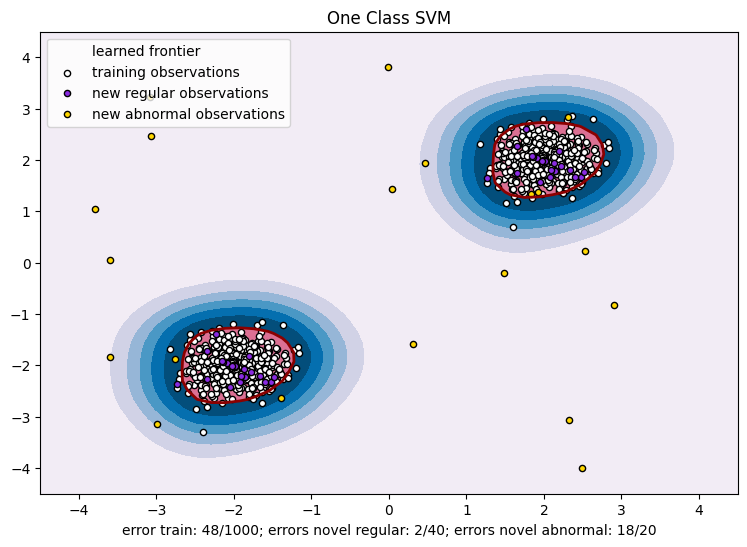

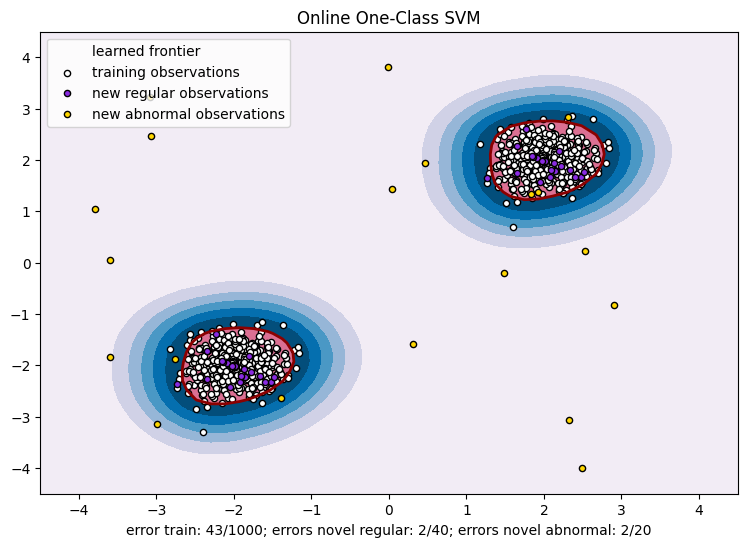

In [33]:
# plot the level sets of the decision function
plt.figure(figsize=(9, 6))
plt.title("One Class SVM")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
    "error train: %d/%d; errors novel regular: %d/%d; errors novel abnormal: %d/%d"
    % (
        n_error_train,
        X_train.shape[0],
        n_error_test,
        X_test.shape[0],
        n_error_outliers,
        X_outliers.shape[0],
    )
)
plt.show()



###############################


plt.figure(figsize=(9, 6))
plt.title("Online One-Class SVM")
plt.contourf(xx, yy, Z_sgd, levels=np.linspace(Z_sgd.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z_sgd, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z_sgd, levels=[0, Z_sgd.max()], colors="palevioletred")

s = 20
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-4.5, 4.5))
plt.ylim((-4.5, 4.5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.xlabel(
    "error train: %d/%d; errors novel regular: %d/%d; errors novel abnormal: %d/%d"
    % (
        n_error_train_sgd,
        X_train.shape[0],
        n_error_test_sgd,
        X_test.shape[0],
        n_error_outliers_sgd,
        X_outliers.shape[0],
    )
)
plt.show()